In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(3).append(train.tail(3))

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [4]:
train.shape

(3000888, 6)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
train.isnull().mean().mul(100)

id             0.0
date           0.0
store_nbr      0.0
family         0.0
sales          0.0
onpromotion    0.0
dtype: float64

## Exploratory Data Analysis

In [7]:
# Convert date to datetime format

train['date'] = pd.to_datetime(train['date'])

In [8]:
# Extract some features from date column

train['year'] = train['date'].dt.isocalendar().year
train['month'] = train['date'].dt.month
train['weekofyear'] = train['date'].dt.isocalendar().week
train['dayofweek'] = train['date'].dt.isocalendar().day
train['dayofmonth'] = train['date'].dt.day
train['dayofyear'] = train['date'].dt.dayofyear

In [9]:
# Convert new features to int dtype

train[['year', 'weekofyear', 'dayofweek']] = train[['year', 'weekofyear', 'dayofweek']].astype(int)

In [10]:
train.head(1)

,id,date,store_nbr,family,sales,onpromotion,year,month,weekofyear,dayofweek,dayofmonth,dayofyear
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,2,1,1


In [11]:
train['store_nbr'].nunique()

54

In [12]:
train['family'].nunique()

33

* There are 54 store branches.
* There 33 type of product or product category sold.

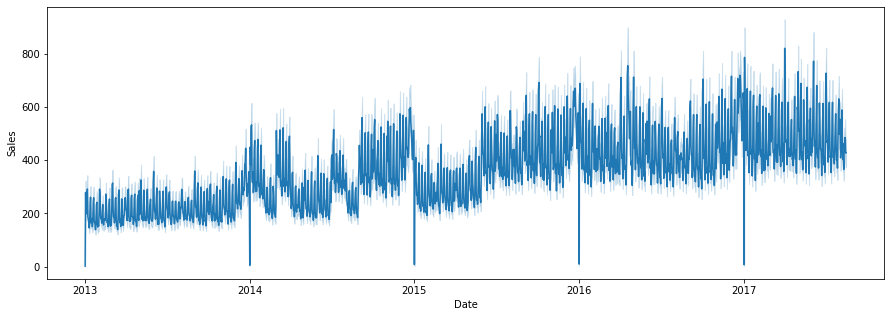

In [13]:
plt.figure(figsize=(15,5))

sns.lineplot(x='date', y='sales', data=train)
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

In [14]:
train.query('dayofyear == 1 & sales > 0').head(3)

,id,date,store_nbr,family,sales,onpromotion,year,month,weekofyear,dayofweek,dayofmonth,dayofyear
563,563,2013-01-01,25,BEAUTY,2.000,0,2013,1,1,2,1,1
564,564,2013-01-01,25,BEVERAGES,810.000,0,2013,1,1,2,1,1
566,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2013,1,1,2,1,1


* The decline in sales on the first day of the year may be because stores are closed due to the New Year holiday. Except store with nbr number 25.

### Add holidays feature

In [15]:
holidays = pd.read_csv('holidays_events.csv')

In [16]:
holidays.tail(3)

,date,type,locale,locale_name,description,transferred
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [17]:
holidays.shape

(350, 6)

In [18]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [19]:
df = pd.merge(left=train, right=holidays, how='left', on='date')

In [20]:
# df.to_csv('store_sales.csv')

In [21]:
df.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
year                 0
month                0
weekofyear           0
dayofweek            0
dayofmonth           0
dayofyear            0
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

* The null value appears to be from a date that is not a holiday.

### Drop and pop some features

In [22]:
df.drop(['id', 'locale', 'locale_name', 'description'], axis=1, inplace=True)

In [23]:
family_popped = df.pop('family')

In [24]:
date_popped = df.pop('date')

In [25]:
df.head(3)

,store_nbr,sales,onpromotion,year,month,weekofyear,dayofweek,dayofmonth,dayofyear,type,transferred
0,1,0.0,0,2013,1,1,2,1,1,Holiday,False
1,1,0.0,0,2013,1,1,2,1,1,Holiday,False
2,1,0.0,0,2013,1,1,2,1,1,Holiday,False


In [26]:
df = pd.get_dummies(df)

In [27]:
df.head(3)

,store_nbr,sales,onpromotion,year,month,weekofyear,dayofweek,dayofmonth,dayofyear,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,transferred_False,transferred_True
0,1,0.0,0,2013,1,1,2,1,1,0,0,0,1,0,0,1,0
1,1,0.0,0,2013,1,1,2,1,1,0,0,0,1,0,0,1,0
2,1,0.0,0,2013,1,1,2,1,1,0,0,0,1,0,0,1,0


In [28]:
# Train/Test Split

train = df.query('year == 2016')
test = df.query('year == 2017')

## XGBoost

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

In [30]:
X_train = train.drop('sales', axis=1)
y_train = train['sales']

X_test = test.drop('sales', axis=1)
y_test = test['sales']

In [31]:
reg = xgb.XGBRegressor(
    n_estimators=500,
    early_stopping_rounds=50,
    learning_rate=0.01,
    subsample=0.8, 
    max_depth=16,
    gamma=0.80198330585415034, 
    reg_alpha=23.008226565535971, 
    seed=42)

model = reg.fit(X_train, y_train, 
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)

In [32]:
test['prediction'] = reg.predict(X_test)

In [33]:
df_pred = df.merge(test['prediction'], how='left', left_index=True, right_index=True)

In [34]:
df_pred.tail()

,store_nbr,sales,onpromotion,year,month,weekofyear,dayofweek,dayofmonth,dayofyear,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,transferred_False,transferred_True,prediction
3054343,9,438.133,0,2017,8,33,2,15,227,0,0,0,1,0,0,1,0,35.601681
3054344,9,154.553,1,2017,8,33,2,15,227,0,0,0,1,0,0,1,0,108.870468
3054345,9,2419.729,148,2017,8,33,2,15,227,0,0,0,1,0,0,1,0,1730.379028
3054346,9,121.000,8,2017,8,33,2,15,227,0,0,0,1,0,0,1,0,369.035919
3054347,9,16.000,0,2017,8,33,2,15,227,0,0,0,1,0,0,1,0,35.601681


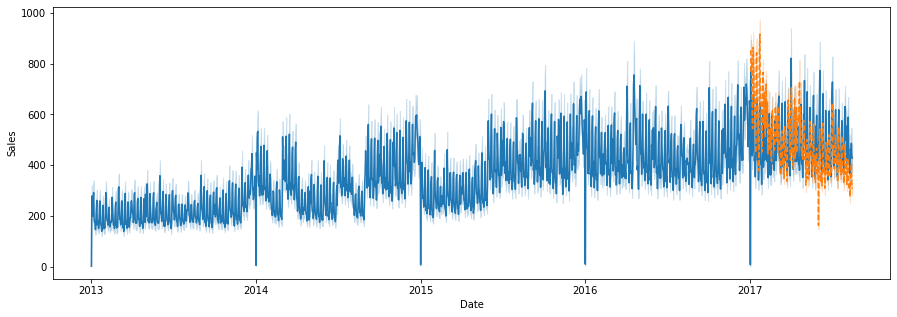

In [35]:
plt.figure(figsize=(15,5))

sns.lineplot(x=date_popped, y='sales', data=df) # Actual number
sns.lineplot(x=date_popped, y='prediction', data=df_pred, ls='--') # Prediction number
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

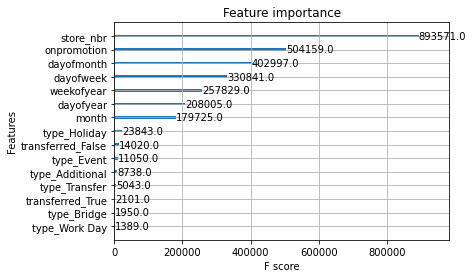

In [36]:
# Feature importance from the model

plot_importance(model)

plt.show()

## Forecast Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
mean_squared_error(y_true = test['sales'],
                   y_pred = test['prediction'])

971016.5157273199

In [39]:
mean_absolute_error(y_true = test['sales'],
                    y_pred = test['prediction'])

411.7619472029542